In [112]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

class BrainTumorDataset(Dataset):
    def __init__(self, image_dir, mask_dir):
        """
        Args:
            image_dir (str): Directory with all the images (NumPy files).
            mask_dir (str): Directory with all the masks (NumPy files).
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.image_filenames = sorted(os.listdir(image_dir))
        self.mask_filenames = sorted(os.listdir(mask_dir))
        
    def __len__(self):
        return len(self.image_filenames)
    
    def __getitem__(self, idx):
        # Load the image and mask
        image = torch.load(os.path.join(self.image_dir, self.image_filenames[idx]),weights_only=True)
        mask = torch.load(os.path.join(self.mask_dir, self.mask_filenames[idx]),weights_only=True)      
        return image, mask

image_dir = '.\BraTS20\BraTS2020_TrainingData\input_data_4channels\\train\images\\'
mask_dir = '.\BraTS20\BraTS2020_TrainingData\input_data_4channels\\train\\masks\\'

dataset = BrainTumorDataset(image_dir=image_dir, mask_dir=mask_dir)

batch_size = 2
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Example loop over the DataLoader
for batch_idx, (images, masks) in enumerate(dataloader):
    print(f"Batch {batch_idx}")
    print("Images shape:", images.shape)  
    print("Masks shape:", masks.shape)    

Batch 0
Images shape: torch.Size([2, 4, 128, 128, 128])
Masks shape: torch.Size([2, 4, 128, 128, 128])
Batch 1
Images shape: torch.Size([2, 4, 128, 128, 128])
Masks shape: torch.Size([2, 4, 128, 128, 128])
Batch 2
Images shape: torch.Size([2, 4, 128, 128, 128])
Masks shape: torch.Size([2, 4, 128, 128, 128])
Batch 3
Images shape: torch.Size([2, 4, 128, 128, 128])
Masks shape: torch.Size([2, 4, 128, 128, 128])
Batch 4
Images shape: torch.Size([2, 4, 128, 128, 128])
Masks shape: torch.Size([2, 4, 128, 128, 128])
Batch 5
Images shape: torch.Size([2, 4, 128, 128, 128])
Masks shape: torch.Size([2, 4, 128, 128, 128])
Batch 6
Images shape: torch.Size([2, 4, 128, 128, 128])
Masks shape: torch.Size([2, 4, 128, 128, 128])
Batch 7
Images shape: torch.Size([2, 4, 128, 128, 128])
Masks shape: torch.Size([2, 4, 128, 128, 128])
Batch 8
Images shape: torch.Size([2, 4, 128, 128, 128])
Masks shape: torch.Size([2, 4, 128, 128, 128])
Batch 9
Images shape: torch.Size([2, 4, 128, 128, 128])
Masks shape: torc

In [113]:
first_batch = next(iter(dataloader))


In [114]:
first_batch= np.array(first_batch)
first_batch.shape 

(2, 2, 4, 128, 128, 128)

In [115]:
img, mask=first_batch
img_num =1

In [116]:
mask.shape

(2, 4, 128, 128, 128)

In [117]:
img = img.transpose(0, 2, 3, 4, 1)  # From [channels, depth, height, width] back to [depth, height, width, channels]
mask = mask.transpose(0, 2, 3, 4, 1)

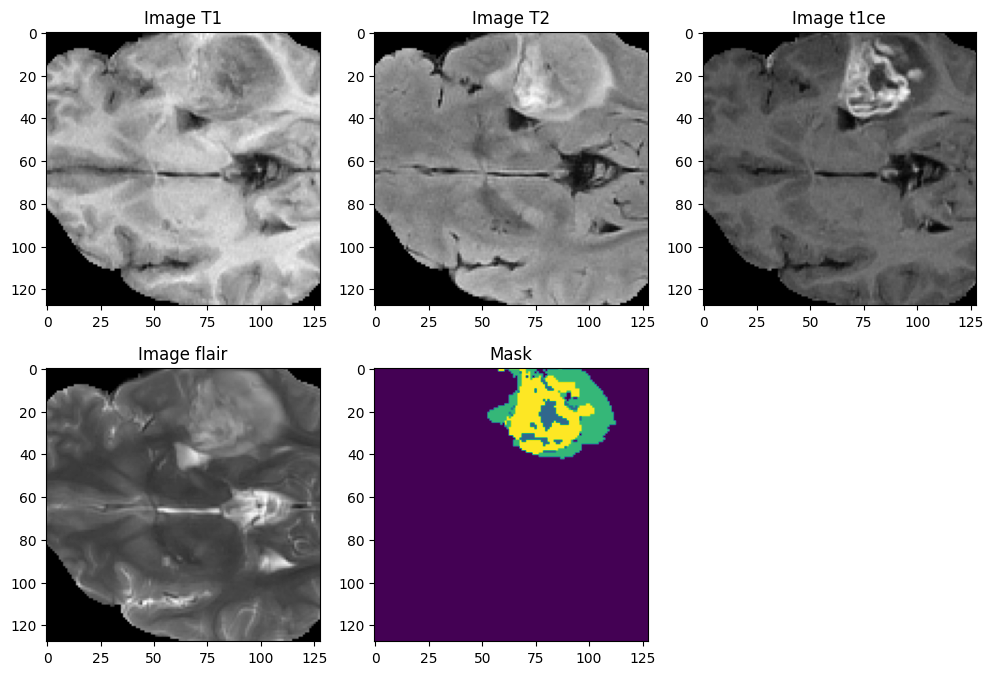

In [126]:
from matplotlib import pyplot as plt
import random

test_img=img[img_num]
test_mask=mask[img_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image T1')
plt.subplot(232)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image T2')
plt.subplot(233)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t1ce')
plt.subplot(234)
plt.imshow(test_img[:,:,n_slice, 3], cmap='gray')
plt.title('Image flair')
plt.subplot(235)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()